In [32]:
import numpy as np
import matplotlib.pyplot as plt

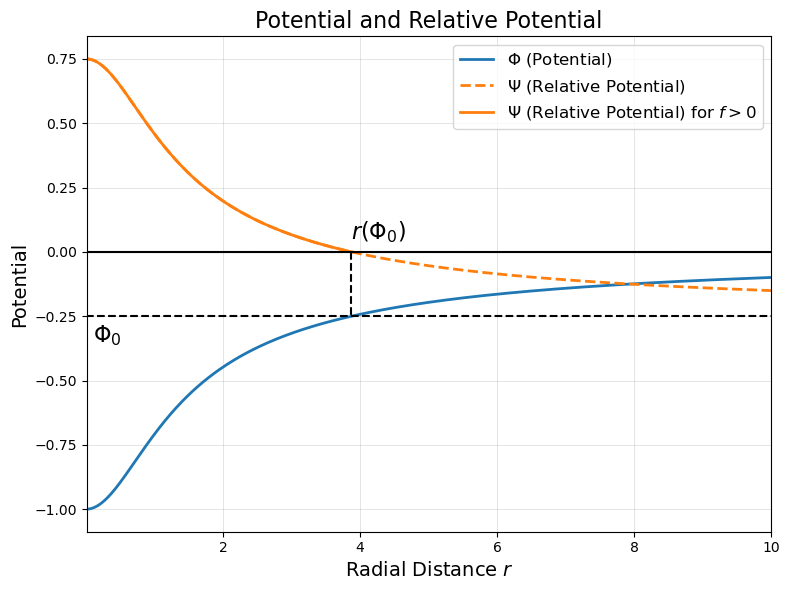

In [39]:
# Constants
G = 1  # Gravitational constant (arbitrary units)
M = 1  # Total mass of the system (arbitrary units)
a = 1  # Scale length of the Plummer potential (arbitrary units)

Phi_0 = -0.25  # Potential offset to mark the edge of the system

# Define Plummer potential function
def plummer_potential(r):
    return -G * M / np.sqrt(r**2 + a**2)

# Define relative potential function
def relative_potential(r):
    Phi = plummer_potential(r)
    return -Phi + Phi_0

# Create radial distances
rr = np.array([1e-2, 10])
r = np.linspace(rr[0], rr[1], 500)  # Avoid r = 0 to prevent singularity

# Compute potentials
Phi = plummer_potential(r)
Psi = relative_potential(r)

# Find r(Phi_0): The radius at which \Phi = \Phi_0
r_Phi_0 = np.sqrt((-G * M / Phi_0)**2 - a**2)

# Compute potentials for plotting up to r(Phi_0)
r_solid = np.linspace(0, r_Phi_0, 100)
Psi_solid = relative_potential(r_solid)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(r, Phi, label=r"$\Phi$ (Potential)", linewidth=2)
plt.plot(r, Psi, label=r"$\Psi$ (Relative Potential)", linestyle='--', linewidth=2, color='tab:orange')
plt.plot(r_solid, Psi_solid, label=r"$\Psi$ (Relative Potential) for $f>0$", linewidth=2, 
         color='tab:orange')

plt.hlines(0, rr[0], rr[1], color='black')

# Add horizontal line for \Phi_0 from r=0 to r(Phi_0)
plt.hlines(Phi_0, 0, rr[1], color='black', linestyle='--')

# Add vertical line for r(Phi_0) from \Phi(0) to \Phi_0
plt.vlines(r_Phi_0, 0, Phi_0, colors='black', linestyle='--')

# Add labels, legend, and title
plt.xlabel(r"Radial Distance $r$", fontsize=14)
plt.ylabel(r"Potential", fontsize=14)
plt.title("Potential and Relative Potential", fontsize=16)
plt.axhline(0, color='black', linewidth=0.8, linestyle=':')
plt.xlim(rr)
plt.legend(fontsize=12)
plt.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

plt.text(0.1, Phi_0-0.1, r'$\Phi_0$', fontsize=16, color="black")
plt.text(r_Phi_0, 0.05, r'$r(\Phi_0)$', fontsize=16, color="black")

plt.tight_layout()

plt.savefig("../Figures/relative_potential.png", format="png", dpi=300, 
            facecolor='white', bbox_inches='tight')

# Show the plot
plt.show()
